Final Assignment - Renee Rosary H. Pintor, CIS 1203 Group 1 TTH 10:30 AM - 12:30 PM

Read about (Susanna Epp pp. 704):

- Kruskal's Algorithm
- Prim's Algorithm
- Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

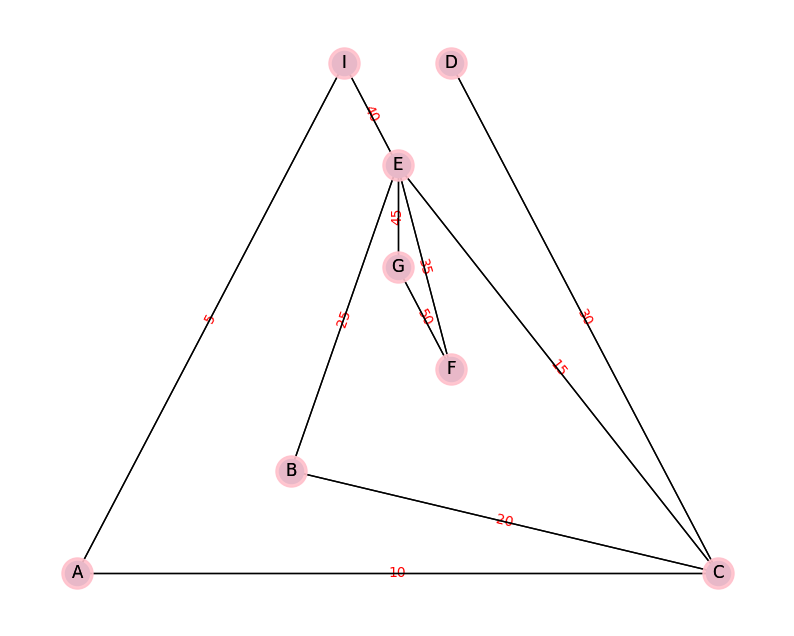

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes5
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

**1. Kruskals Algorithm**

Algorithm according to the book:

Input: G [a connected weighted graph with n vertices, where n is a positive integer]

Algorithm Body:
[Build a subgraph T of G to consist of all the vertices of G with edges added in order of
increasing weight. At each stage, let m be the number of edges of T .]
1. Initialize T to have all the vertices of G and no edges.
2. Let E be the set of all edges of G, and let m := 0.
3. while (m < n − 1)
   <br>3a. Find an edge e in E of least weight.
   <br>3b. Delete e from E.
   <br>3c. if addition of e to the edge set of T does not produce a circuit
then add e to the edge set of T and set m := m + 1<br>

end while<br>
Output: T [T is a minimum spanning tree for G.]

**implementation:**

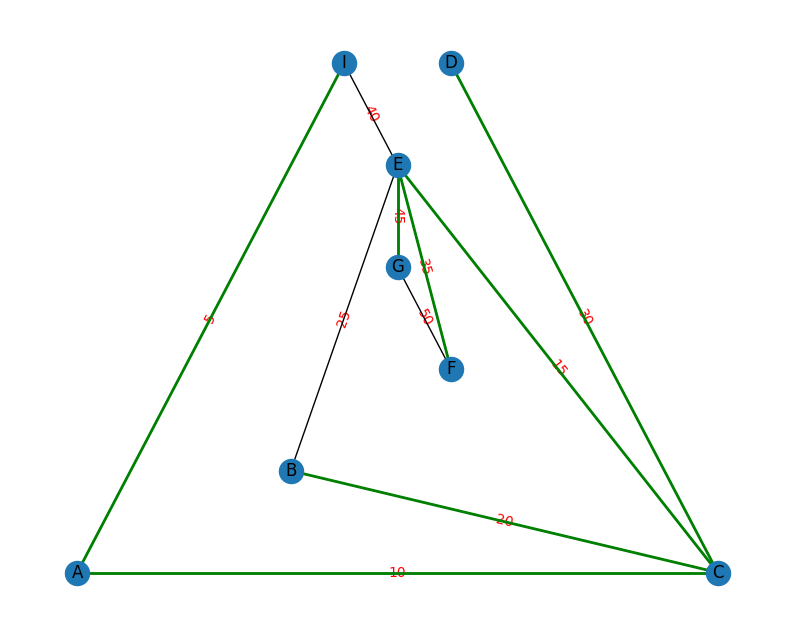

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

class DisjointSet:
    def __init__(self, vertices):
        self.parent = {vertex: vertex for vertex in vertices}
        self.rank = {vertex: 0 for vertex in vertices}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, vertex1, vertex2):
        root1 = self.find(vertex1)
        root2 = self.find(vertex2)
        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

def kruskal(graph):
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    vertices = set(graph.nodes)
    minimum_spanning_tree = nx.Graph()
    disjoint_set = DisjointSet(vertices)

    for edge in edges:
        u, v, weight = edge
        if disjoint_set.find(u) != disjoint_set.find(v):
            disjoint_set.union(u, v)
            minimum_spanning_tree.add_edge(u, v, weight=weight['weight'])

    return minimum_spanning_tree

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

minimum_spanning_tree = kruskal(G)

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(minimum_spanning_tree, pos=pos, edge_color='g', width=2)
plt.show()


**2. Prim's Algorithm**

Input: G [a connected weighted graph with n vertices where n is a positive integer]

Algorithm Body:
[Build a subgraph T of G by starting with any vertex v of G and attaching edges (with
their endpoints) one by one to an as-yet-unconnected vertex of G, each time choosing an
edge of least weight that is adjacent to a vertex of T .]
1. Pick a vertex v of G and let T be the graph with one vertex, v, and no edges.
2. Let V be the set of all vertices of G except v.
3. for i := 1 to n − 1
<br>3a. Find an edge e of G such that <br>(1) e connects T to one of the vertices in
V, and <br>(2) e has the least weight of all edges connecting T to a vertex
in V. Let w be the endpoint of e that is in V.
<br>3b. Add e and w to the edge and vertex sets of T , and delete w from V.
<br>next i

Output: T [T is a minimum spanning tree for G.]

**implementation:**

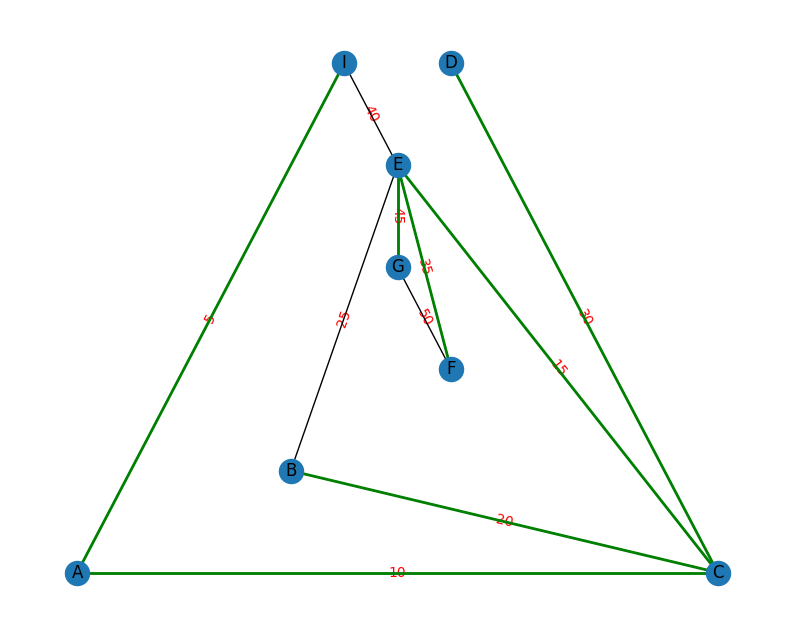

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

def prim(graph):
    T = nx.Graph()
    initial_vertex = list(graph.nodes())[0]
    T.add_node(initial_vertex)  
    V = set(graph.nodes()) - {initial_vertex} 

    for _ in range(len(graph.nodes()) - 1):
        min_weight = float('inf')
        min_edge = None

        for u in T.nodes():
            for v in V:
                if graph.has_edge(u, v) and graph[u][v]['weight'] < min_weight:
                    min_weight = graph[u][v]['weight']
                    min_edge = (u, v)

        u, v = min_edge
        T.add_edge(u, v, weight=min_weight)

        V.remove(v)

    return T

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

minimum_spanning_tree = prim(G)

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(minimum_spanning_tree, pos=pos, edge_color='g', width=2)
plt.show()


**3. Djitraka's Shortest Path Algorithm**

Input: G [a connected simple graph with a positive weight for every edge], ∞ [a num-
ber greater than the sum of the weights of all the edges in the graph], w(u, v) [the weight of edge {u, v}], a [the starting vertex], z [the ending vertex]

Algorithm Body:
1. Initialize T to be the graph with vertex a and no edges. Let V(T ) be the set of
vertices of T , and let E(T ) be the set of edges of T .
2. Let L(a) = 0, and for all vertices in G except a, let L(u) = ∞.
[The number L(x) is called the label of x.]
3. Initialize v to equal a and F to be {a}.
[The symbol v is used to denote the vertex most recently added to T.]
4. while (z ∈ V(T ))
<br>4a. F := (F − {v}) ∪ {vertices that are adjacent to v and are not in V(T )}
[The set F is called the fringe. Each time a vertex is added to T, it is removed
from the fringe and the vertices adjacent to it are added to the fringe if they are
not already in the fringe or the tree T.]
<br>4b. For each vertex u that is adjacent to v and is not in V(T ),
if L(v) + w(v, u) < L(u) then

       L(u) := L(v) + w(v, u)
        <br>D(u) := v

[Note that adding v to T does not affect the labels of any vertices in the fringe F
except those adjacent to v. Also, when L(u) is changed to a smaller value, the
notation D(u) is introduced to keep track of which vertex in T gave rise to the
smaller value.]

4c. Find a vertex x in F with the smallest label
<br>Add vertex x to V(T ), and add edge {D(x), x} to E(T )
<br>v := x [This statement sets up the notation for the next iteration of the loop.]

end while

Output: L(z) [L(z), a nonnegative integer, is the length of the shortest path from
a to z.]

**implementation:**

Length of the shortest path from A to every other node:
{'A': 0, 'B': 30, 'C': 10, 'D': 40, 'E': 25, 'F': 60, 'G': 70, 'I': 5}


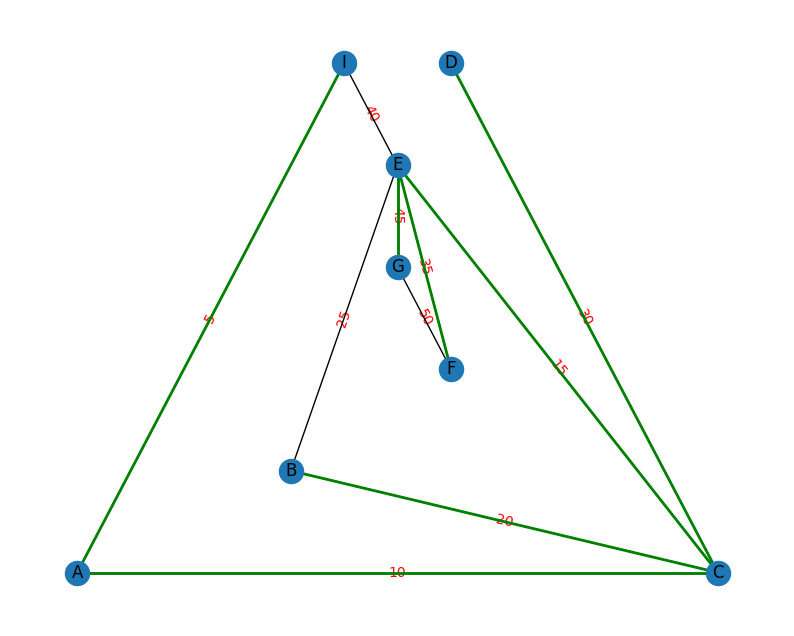

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

def dijkstra(graph, start, end):
    T = {start}
    labels = {node: float('inf') for node in graph.nodes()}
    labels[start] = 0
    parent = {node: None for node in graph.nodes()}

    fringe = {start}

    while end not in T:
        for v in T:
            fringe |= {neighbor for neighbor in graph.neighbors(v) if neighbor not in T}
        
        min_label = float('inf')
        min_vertex = None
        for vertex in fringe:
            if labels[vertex] < min_label:
                min_label = labels[vertex]
                min_vertex = vertex

        T.add(min_vertex)

        for neighbor in graph.neighbors(min_vertex):
            if neighbor not in T:
                edge_weight = graph[min_vertex][neighbor]['weight']
                if min_label + edge_weight < labels[neighbor]:
                    labels[neighbor] = min_label + edge_weight
                    parent[neighbor] = min_vertex  # Update parent of neighbor to min_vertex
        
        fringe.remove(min_vertex)

    tree_edges = {(parent[node], node) for node in parent if parent[node] is not None}

    return labels[end], tree_edges, labels

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

shortest_path_lengths = {}
shortest_path_tree_edges = set()
shortest_path_lengths['A'], shortest_path_tree_edges, shortest_path_lengths_all = dijkstra(G, 'A', 'G')
print("Length of the shortest path from A to every other node:")
print(shortest_path_lengths_all)

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw(G, pos=pos, with_labels=True)

nx.draw_networkx_edges(G, pos=pos, edgelist=shortest_path_tree_edges, edge_color='g', width=2)

plt.show()
